# Importing Dataset

In [1]:
import pandas as pd
airline_survey = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', 20)  # Limit column width to 20 characters

# Display the DataFrame
print(airline_survey)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

# Exploratory Data Analysis EDA

## Target to Target Relationship

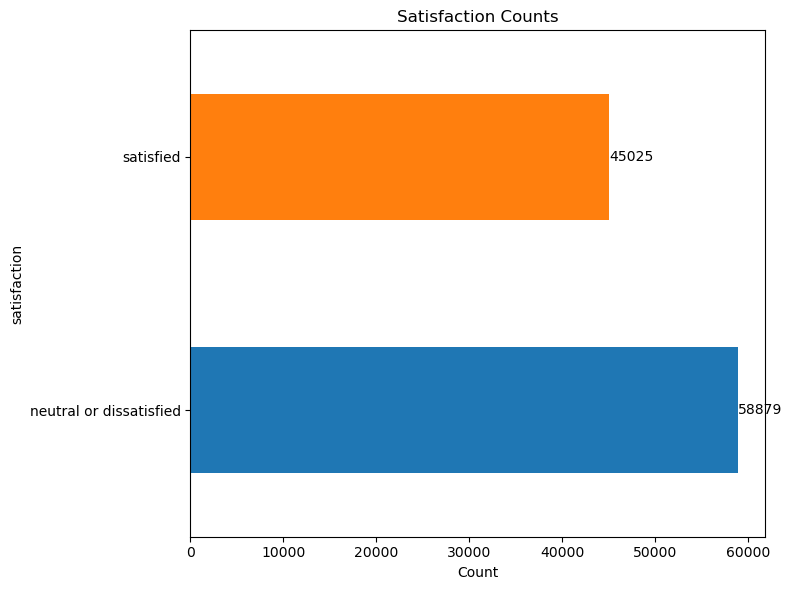

In [3]:
import matplotlib.pyplot as plt

# Group and count satisfaction levels
satisfaction_counts = airline_survey['satisfaction'].value_counts()

# Plot the bar chart with labels
ax = satisfaction_counts.plot.barh(figsize=(8, 6), color=['#1f77b4', '#ff7f0e'], title="Satisfaction Counts")
for i, value in enumerate(satisfaction_counts):
    ax.text(value, i, f'{value}', va='center', fontsize=10)  # Add labels directly on bars

# Show the chart
plt.xlabel("Count")
plt.tight_layout()
plt.show()

## Feature to Feature Relationship

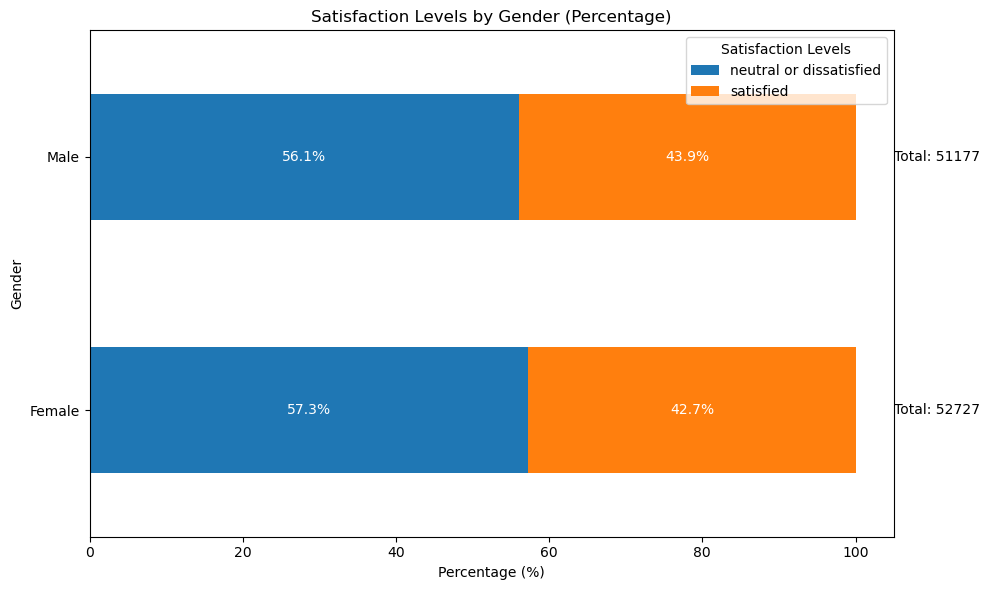

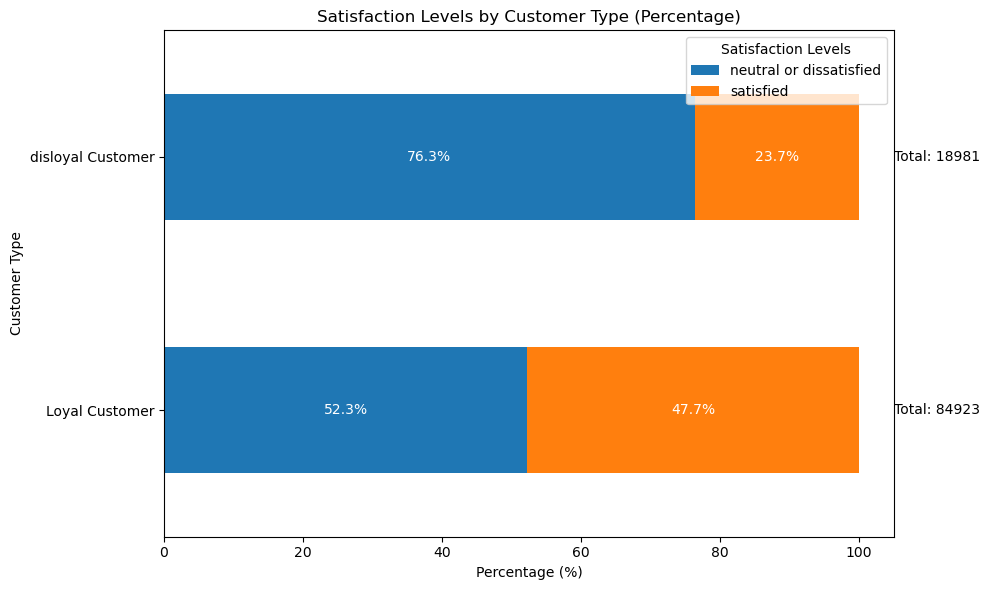

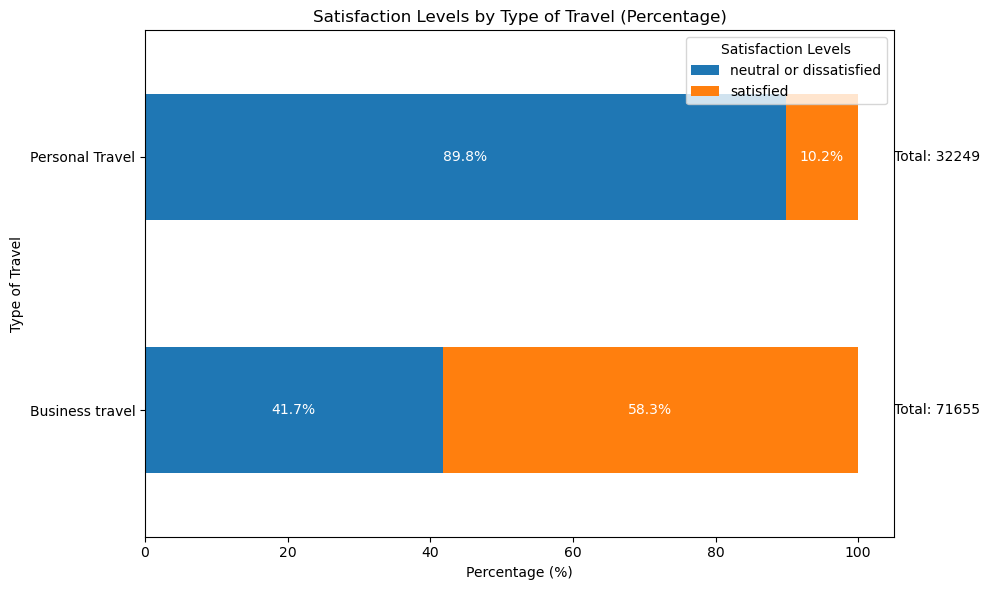

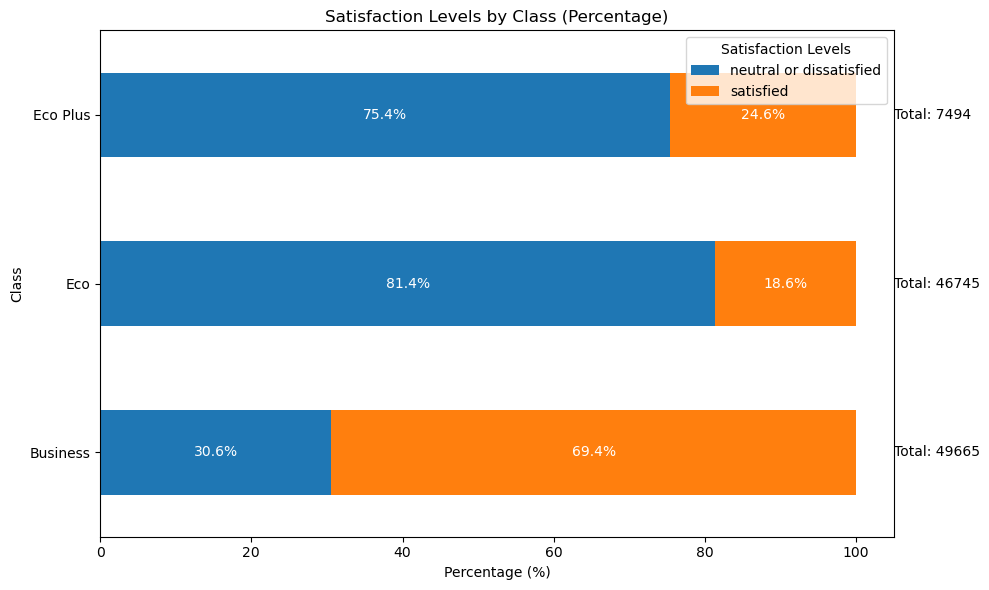

In [5]:
import matplotlib.pyplot as plt

# Columns to visualize
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Loop through each column
for col in columns:
    # Group by the column and Satisfaction, then count
    satisfaction_counts = airline_survey.groupby([col, 'satisfaction']).size().unstack()

    # Normalize to calculate percentages
    satisfaction_percentages = satisfaction_counts.div(satisfaction_counts.sum(axis=1), axis=0) * 100

    # Calculate total counts for each category
    totals = satisfaction_counts.sum(axis=1)

    # Plot the satisfaction levels as a percentage bar chart
    ax = satisfaction_percentages.plot(
        kind='barh', stacked=True, figsize=(10, 6), title=f"Satisfaction Levels by {col} (Percentage)"
    )

    # Add labels to each segment
    for i, category in enumerate(satisfaction_percentages.index):  # Enumerate to get numeric index
        cumulative = 0
        for satisfaction_level in satisfaction_percentages.columns:
            value = satisfaction_percentages.loc[category, satisfaction_level]
            if value > 0:  # Avoid displaying labels for 0%
                ax.text(
                    cumulative + value / 2, i, f"{value:.1f}%", va='center', ha='center', color='white', fontsize=10
                )
            cumulative += value

        # Add total count at the end of each bar
        ax.text(105, i, f"Total: {totals[category]}", va='center', ha='left', fontsize=10, color='black')

    # Customize chart
    plt.xlabel("Percentage (%)")
    plt.ylabel(col)
    plt.legend(title="Satisfaction Levels", loc="upper right")
    plt.tight_layout()
    plt.show()

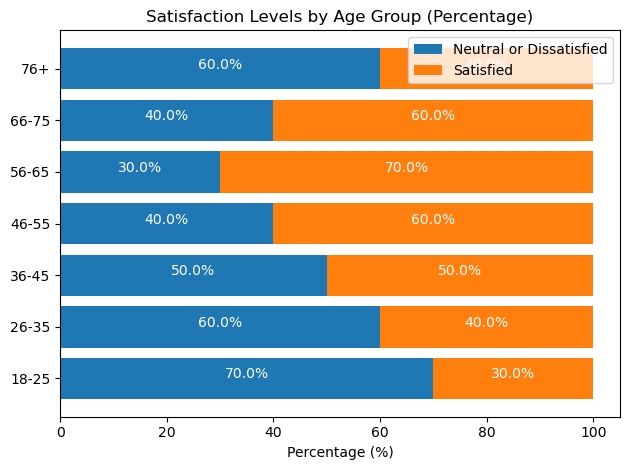

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
satisfied = [30, 40, 50, 60, 70, 60, 40]
dissatisfied = [70, 60, 50, 40, 30, 40, 60]
totals = [s + d for s, d in zip(satisfied, dissatisfied)]

# Convert to percentages
satisfied_pct = [s / t * 100 for s, t in zip(satisfied, totals)]
dissatisfied_pct = [d / t * 100 for d, t in zip(dissatisfied, totals)]

# Updated colors
colors = ['#1F77B4', '#FF7F0E']  # New blue and orange

# Horizontal bar chart
plt.barh(age_groups, dissatisfied_pct, color=colors[0], label='Neutral or Dissatisfied')
plt.barh(age_groups, satisfied_pct, left=dissatisfied_pct, color=colors[1], label='Satisfied')

# Add percentages to bars
for i, (d, s) in enumerate(zip(dissatisfied_pct, satisfied_pct)):
    plt.text(d / 2, i, f'{d:.1f}%', color='white', ha='center')
    plt.text(d + s / 2, i, f'{s:.1f}%', color='white', ha='center')

# Labels, title, and legend
plt.xlabel('Percentage (%)')
plt.title('Satisfaction Levels by Age Group (Percentage)')
plt.legend()
plt.tight_layout()
plt.show()

## Feature to Feature Relation

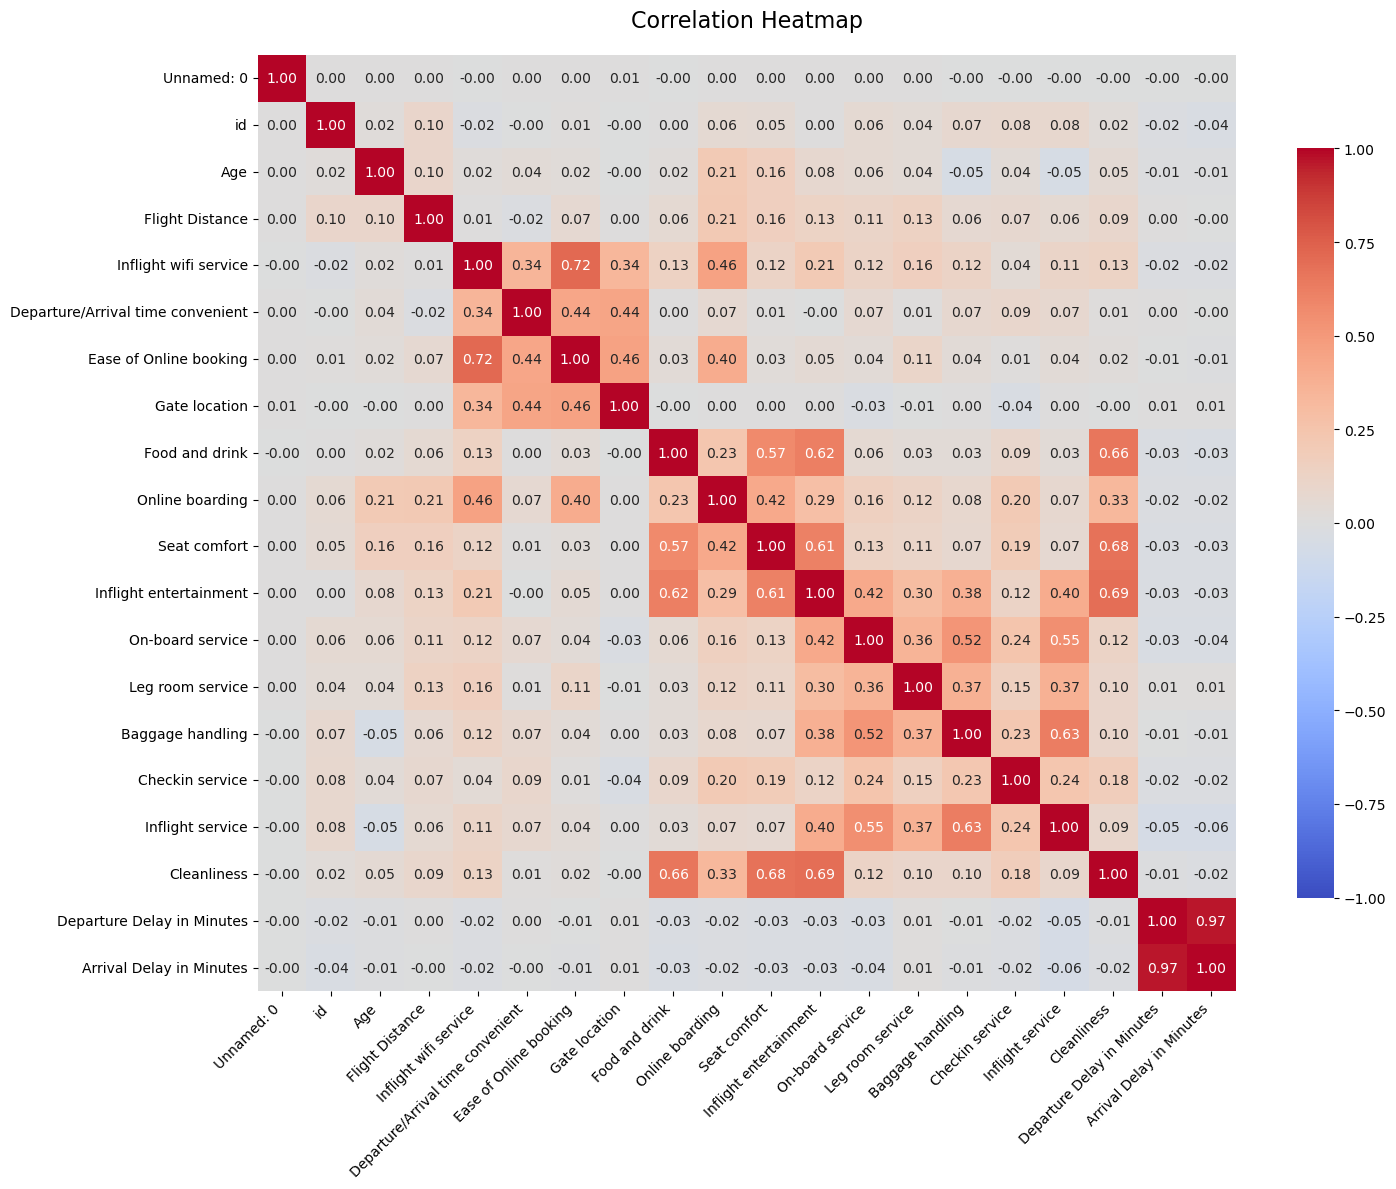

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation heatmap
plt.figure(figsize=(15, 12))  # Adjust the figure size
sns.heatmap(
    airline_survey.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    cbar_kws={'shrink': 0.8}  # Shrink the color bar
)

# Adjust label size and layout
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.title("Correlation Heatmap", fontsize=16, pad=20)  # Add a title with spacing
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()

# Data Pre-Processing

## Data Explore

In [9]:
airline_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## Converting Data Type

In [11]:
# Handle NaN values
airline_survey['Arrival Delay in Minutes'] = airline_survey['Arrival Delay in Minutes'].fillna(0)

# Handle inf and -inf values
airline_survey['Arrival Delay in Minutes'] = airline_survey['Arrival Delay in Minutes'].replace([float('inf'), float('-inf')], 0)

# Convert to int64
airline_survey['Arrival Delay in Minutes'] = airline_survey['Arrival Delay in Minutes'].astype('int64')

# Verify the result
print(airline_survey.dtypes)

Unnamed: 0                            int64
id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes      

## Imputing Missing Values

In [13]:
# List of columns where 0 needs to be replaced
columns_to_impute = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 
    'Ease of Online booking', 'Gate location', 'Food and drink', 
    'Online boarding', 'Seat comfort', 'Inflight entertainment', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Loop through each column and replace 0 with the column's mean
for col in columns_to_impute:
    # Calculate the mean excluding 0 values
    mean_value = airline_survey[airline_survey[col] != 0][col].mean()
    
    # Replace 0 values with the calculated mean
    airline_survey[col] = airline_survey[col].replace(0, mean_value)

# Verify changes
print(airline_survey[columns_to_impute].describe())

       Inflight wifi service  Departure/Arrival time convenient  \
count        103904.000000          103904.000000                 
mean              2.813712               3.224788                 
std               1.238449               1.349983                 
min               1.000000               1.000000                 
25%               2.000000               2.000000                 
50%               3.000000               3.224788                 
75%               4.000000               4.000000                 
max               5.000000               5.000000                 

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count        103904.000000     103904.000000   103904.000000    103904.000000   
mean              2.881328          2.976911        3.205430         3.328147   
std               1.270420          1.277588        1.325552         1.252352   
min               1.000000          1.000000        1.000000         1.0

## Checking Missing Values

In [15]:
airline_survey.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Checking Data Consistency

In [17]:
# Checking data inconsitency and typo in Categorical Data
columns = ["Gender", "Customer Type", "Type of Travel", "Class"]

for col in columns:
    print(f"Value counts for {col}:")
    print(airline_survey[col].value_counts())
    print("\n")

Value counts for Gender:
Gender
Female    52727
Male      51177
Name: count, dtype: int64


Value counts for Customer Type:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


Value counts for Type of Travel:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


Value counts for Class:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64




## Checking Duplicate Data

In [19]:
airline_survey.duplicated().sum()

0

## Dropping Unrelated Variables

In [21]:
# Drop the 'Unnamed: 0','id' and 'Arrival Delay in Minutes' column
airline_survey = airline_survey.drop(columns=['Unnamed: 0','Arrival Delay in Minutes','id'])

# Verify that the column has been removed
print(airline_survey.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')


# Data Encoding

## One Hot Encoding

In [23]:
import numpy as np

categorical_columns = ["Gender", "Customer Type", "Type of Travel", "Class"]
category_dummies = pd.get_dummies(
    airline_survey, 
    columns=categorical_columns, 
    dtype=np.int64, 
    drop_first=True
)
print(category_dummies)

        Age  Flight Distance  Inflight wifi service  \
0        13              460                  3.0     
1        25              235                  3.0     
2        26             1142                  2.0     
3        25              562                  2.0     
4        61              214                  3.0     
...     ...              ...                  ...     
103899   23              192                  2.0     
103900   49             2347                  4.0     
103901   30             1995                  1.0     
103902   22             1000                  1.0     
103903   27             1723                  1.0     

        Departure/Arrival time convenient  Ease of Online booking  \
0                       4.0                                3.0      
1                       2.0                                3.0      
2                       2.0                                2.0      
3                       5.0                                5.0 

## Label Encoding

In [25]:
# Encode the dependent variable 'Satisfaction' 
category_dummies["satisfaction_Encoded"] = category_dummies["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

print(category_dummies)

        Age  Flight Distance  Inflight wifi service  \
0        13              460                  3.0     
1        25              235                  3.0     
2        26             1142                  2.0     
3        25              562                  2.0     
4        61              214                  3.0     
...     ...              ...                  ...     
103899   23              192                  2.0     
103900   49             2347                  4.0     
103901   30             1995                  1.0     
103902   22             1000                  1.0     
103903   27             1723                  1.0     

        Departure/Arrival time convenient  Ease of Online booking  \
0                       4.0                                3.0      
1                       2.0                                3.0      
2                       2.0                                2.0      
3                       5.0                                5.0 

In [27]:
encoded_airline_survey = category_dummies
encoded_airline_survey.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_Encoded
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,neutral or dissa...,1,0,1,0,1,0
1,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,neutral or dissa...,1,1,0,0,0,0
2,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,satisfied,0,0,0,0,0,1
3,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,neutral or dissa...,0,0,0,0,0,0
4,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,satisfied,1,0,0,0,0,1


In [31]:
import pandas as pd
import numpy as np

# Handling conversion of all columns to int64
for col in encoded_airline_survey.columns:
    if encoded_airline_survey[col].dtype == 'object':
        # Convert object columns to categorical codes (integer encoding)
        encoded_airline_survey[col] = encoded_airline_survey[col].astype('category').cat.codes
    elif encoded_airline_survey[col].dtype == 'float64':
        # Convert float columns to int64 (after rounding to avoid issues)
        encoded_airline_survey[col] = np.round(encoded_airline_survey[col]).astype('int64')
    else:
        # Ensure numeric columns are int64
        encoded_airline_survey[col] = encoded_airline_survey[col].astype('int64')

# Confirm changes
print(encoded_airline_survey.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

In [29]:
encoded_airline_survey = category_dummies
encoded_airline_survey.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_Encoded
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,neutral or dissa...,1,0,1,0,1,0
1,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,neutral or dissa...,1,1,0,0,0,0
2,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,satisfied,0,0,0,0,0,1
3,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,neutral or dissa...,0,0,0,0,0,0
4,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,satisfied,1,0,0,0,0,1


## Dropping Original Target Variable

In [33]:
encoded_airline_survey = encoded_airline_survey.drop("satisfaction", axis=1)
encoded_airline_survey.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_Encoded
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0,0,0,0,1


In [35]:
# Save the updated DataFrame to a CSV file
encoded_airline_survey.to_csv("encoded_airline_survey.csv", index=False)